<h1 align="center" style="margin-top:7px">Лабораторная работа 1</h1>
<h2 align="center" style="margin-top:7px">Анализ целевой аудитории группы VK</h2>
<br>

In [ ]:
# Установите необходимые пакеты
 # Для интерактиных свобных таблиц в pandas-profiling
!conda install -c anaconda pandas-profiling 
# Plotly – обязательное условие перед установкой cufflinks
!pip install plotly 
# Для интерактивного отображения графиков
!pip install cufflinks 
# Для отображения геоданных
!conda install geopandas 
!conda install bokeh

In [331]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
# this is to clear the warnings from this page, typically you would leave them on
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
# импорт plotly и cufflinks в автономном режиме для интерактивного отображения графиков
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#Отображение всех output ('last_expr' для отключения)
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" 

 *Для удобства восприятия отчета, вы можете использовать кнопку ниже, чтобы показать или скрыть код.*

In [306]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

## Описание отчета

В этом документе представлен анализ аудитории группы VK, в которой предполагается продвижение одного из товаров компании.

## Подготовка данных к анализу

Для начала взглянем на имеющийся набор данных. Набор включает данные: 
* о количестве просмотров и посетителей группы;
* об охвате аудитории среди подписчиков и остальных пользователей;
* об обратной связи посетителей группы (кол-во лайков, репостов и комментариев)
* о половозрастном составе посетителей группы
* о географии посетителей группы

Охвачен период с 1 августа 2016 по 15 марта 2020 года

In [128]:
#Импорт данных
data=pd.read_csv('VK.csv')
data
data[['День', 'Месяц', 'Год']]=data.Дата.str.split('.', expand=True, )

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,15.03.2020,views,NaN,NaN,4
1,15.03.2020,visitors,NaN,NaN,3
2,15.03.2020,gender,М,NaN,3
3,15.03.2020,age,24-27,NaN,1
4,15.03.2020,age,30-35,NaN,2
...,...,...,...,...,...
46407,02.08.2016,reach_subscribers,NaN,NaN,20
46408,02.08.2016,reach_viral,NaN,NaN,109
46409,01.08.2016,reach,NaN,NaN,203
46410,01.08.2016,reach_subscribers,NaN,NaN,28


Первым делом данные были преобразованы для дальнейшего анализа: для каждого дня за период от 1 августа 2016 до 15 марта 2020 найдены:
* количество просмотров группы
* количество посетителей группы
* общий охват аудитории
* охват подписчиков группы
* виральных охват
* количество отметов "Нравится"
* количество репостов записей 
* количество оставленных комментариев

In [307]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

In [211]:
#Просмотры/посещения
views=data.loc[(data['Критерий']=='views'), ['Значение', 'Дата']].rename(columns={'Значение':'Просмотры'})
visitors=data.loc[(data['Критерий']=='visitors'), ['Значение', 'Дата']].rename(columns={'Значение':'Посещения'})
views_visitors=pd.merge(views, visitors, on='Дата')

#Охват аудитории
reach=data.loc[(data['Критерий']=='reach'), ['Значение', 'Дата']].rename(columns={'Значение':'Охв. общий'})
reach_viral=data.loc[(data['Критерий']=='reach_viral'), ['Значение', 'Дата']].rename(columns={'Значение':'Охв. виральный'})
reach_sub_viral=reach.merge(reach_viral, on='Дата')
reach_sub_viral['Охв. подписч.']=reach_sub_viral['Охв. общий']-reach_sub_viral['Охв. виральный']

feedback=data.loc[data['Критерий']=='feedback', ['Значение', 'Парам. №1', 'Дата']]
date=pd.DataFrame(np.array(views_visitors['Дата']), columns=['Дата'])

#Лайки
likes=feedback[feedback['Парам. №1']=='Нравится']
likes=pd.merge(date, likes, on='Дата', how='left')
likes=likes.rename(columns={'Значение':'Лайки'}).fillna(0)[['Дата','Лайки']]
likes['Лайки']=likes['Лайки'].astype(int)


#Репосты
reposts=feedback[feedback['Парам. №1']=='Рассказали друзьям']
reposts=pd.merge(date, reposts, on='Дата', how='left')
reposts=reposts.rename(columns={'Значение':'Репосты'}).fillna(0)[['Дата','Репосты']]
reposts['Репосты']=reposts['Репосты'].astype(int)

#Комментарии
comments=feedback[feedback['Парам. №1']=='Комментарии']
comments=pd.merge(date, comments, on='Дата', how='left')
comments=comments.rename(columns={'Значение':'Комментарии'}).fillna(0)[['Дата','Комментарии']]
comments['Комментарии']=comments['Комментарии'].astype(int)

# Сводная таблица по посещаемости, охвату и обратной связи по дням
v_r=pd.merge(views_visitors, reach_sub_viral, on='Дата')
v_r_l=pd.merge(v_r, likes, on='Дата')
v_r_l_r=pd.merge(v_r_l, reposts, on='Дата')
v_r_l_r_c=pd.merge(v_r_l_r, comments, on='Дата',)
v_r_l_r_c[['День', 'Месяц', 'Год']]=v_r_l_r_c.Дата.str.split('.', expand=True, )
v_r_l_r_c['Дата']=v_r_l_r_c['Год']+'-'+v_r_l_r_c['Месяц']+'-'+v_r_l_r_c['День']
overral=v_r_l_r_c[['Просмотры','Посещения','Охв. общий','Охв. подписч.', 'Охв. виральный','Лайки','Репосты','Комментарии', 'Дата']]
overral['Дата']=pd.to_datetime(overral['Дата'])
overral['Date']=overral['Дата']
overral=overral.set_index('Дата')
overral
#Добавляем метки кварталов и месяцев
overral['quaters'] = overral['Date'].dt.to_period('Q')
overral['months'] = overral['Date'].dt.to_period('M')

,Просмотры,Посещения,Охв. общий,Охв. подписч.,Охв. виральный,Лайки,Репосты,Комментарии,Date
Дата,,,,,,,,,
2020-03-15,4,3,6,3,3,0,0,0,2020-03-15
2020-03-14,14,10,16,5,11,0,0,0,2020-03-14
2020-03-13,16,7,12,3,9,2,0,0,2020-03-13
2020-03-12,17,13,16,4,12,1,0,0,2020-03-12
2020-03-11,13,10,17,3,14,0,0,0,2020-03-11
...,...,...,...,...,...,...,...,...,...
2016-08-05,53,39,132,33,99,3,1,0,2016-08-05
2016-08-04,37,32,172,22,150,5,1,0,2016-08-04
2016-08-03,52,39,117,29,88,3,0,0,2016-08-03


Ниже приведена описательная статистика по набору и его общие свойства

In [4]:
import pandas_profiling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pandas_profiling.ProfileReport(over)


Number of variables,9
Number of observations,1323
Total Missing (%),0.0%
Total size in memory,77.6 KiB
Average record size in memory,60.1 B
Numeric,7
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


## 1. Анализ просмотров и посещаемости группы

Первым делом посмотрим на динамику посещаемости и просмотров группы. Можно видеть как количество просмотров и посещений растет в 2016 году до 34 просмотров и 25 посещений в сутки, но затем начинается падение вплоть до второго квартала 2019 года. Далее наблюдается кратковременный рост, однако в первом квартале 2020 суточные просмотры и посещения опять падают

In [308]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

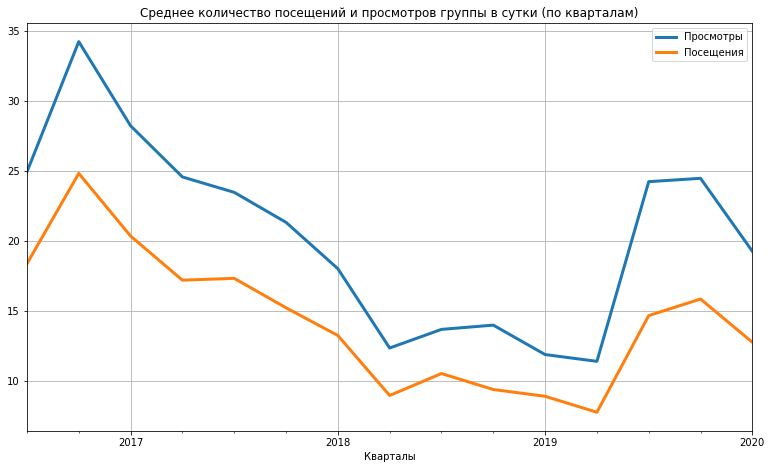

In [165]:
overr=overral
overralwithout2020=overr[overr['quaters'] != '2020Q1']
overral2020=overr[overr['quaters'] == '2020Q1']
overralwithout2020=overralwithout2020.groupby(['quaters'])[['Посещения', 'Просмотры']].aggregate(sum)
overral2020=overral2020.groupby(['quaters'])[['Посещения', 'Просмотры']].aggregate(sum)
#Рассчет суточных просмотров, где 75 - количество дней в 2020 до 15 марта
overralwithout2020=overralwithout2020[['Просмотры', 'Посещения']]/(30.4167*4)
overral2020=overral2020[['Просмотры', 'Посещения']]/75
o=pd.concat([overralwithout2020,overral2020])
o=o.reset_index()
o=o.rename(columns={'quaters': 'Кварталы'})
o=o.set_index('Кварталы')
o.plot(kind='line', title='Среднее количество посещений и просмотров группы в сутки (по кварталам)', linewidth=3, grid=True, figsize=(13,7.5), use_index=True);

Стоит обратить внимание, что доля тех пользователей, которые после просмотра посетили группу остается стабильной на уровне примерно 71%.

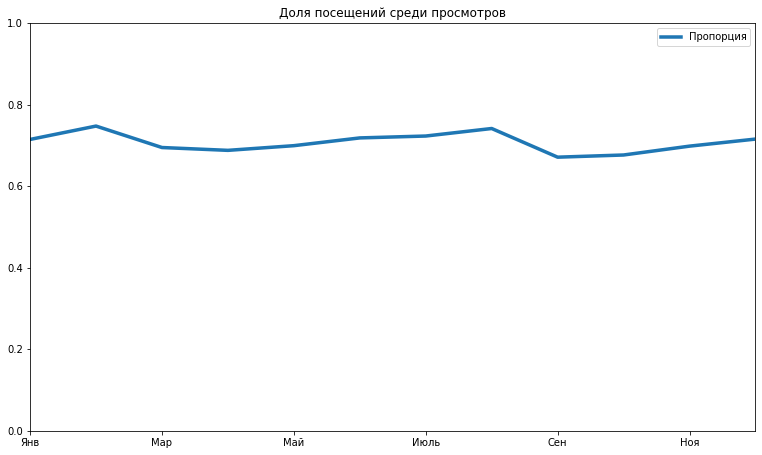

In [224]:
views_visitors.loc[:,'Месяц'] = overral.index.month
views_visitors_count = views_visitors.groupby('Месяц').aggregate(sum)
views_visitors_count.index = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг','Сен', 'Окт', 'Ноя', 'Дек']
views_visitors_count['Пропорция']=views_visitors_count['Посещения']/views_visitors_count['Просмотры']
vvv=views_visitors_count[['Пропорция']].plot(title='Доля посещений среди просмотров', ylim=(0,1), figsize=(13,7.5), linewidth=3.5, grid=False);

## 2. Анализ охвата аудитории

Охват аудитории — это один из ключевых параметров (KPI) в интернет-маркетинге, показывающий число уникальных пользователей, увидевших контент. У каждой записи, поста или видео охват может отличаться. Чтобы пользователь был засчитан, ему не обязательно как-либо взаимодействовать с публикацией. Поэтому охват может превышать количество просмотров группы и его также стоит проанализировать.

Для начала посмотрим на месячных общий охват аудитории группы. Можно увидеть что в большинстве месяцев контент группы видит в среднем от 3000 до 5000 человек, однако в осенние месяцы этот может доходить до 14000.

In [149]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

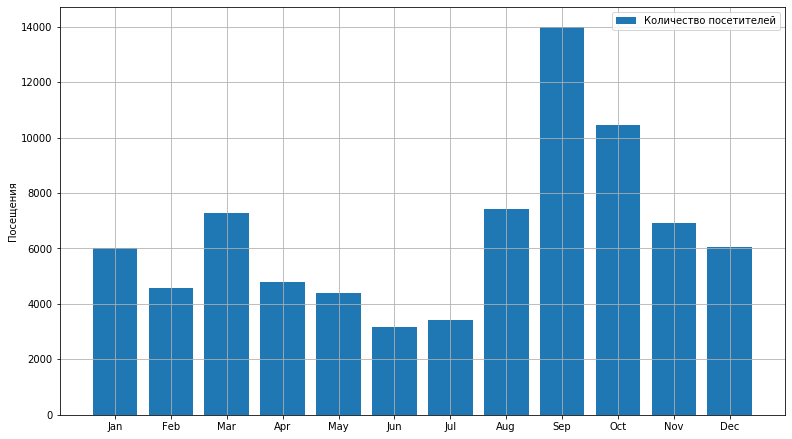

In [216]:
reach_sub_viral.loc[:,'Месяц'] = overral.index.month
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
reach = list(reach_sub_viral['Охв. общий'].groupby(reach_sub_viral['Месяц']).sum())
fig, ax = plt.subplots(figsize=(13,7.5))
bar = ax.bar(month, reach, label = "Количество посетителей")
ax.set_ylabel("Посещения")
ax.legend()
plt.grid()
p=plt.show();

Охват аудитории группы в социальной сети включает в себя как охват подписчиков, так и охват аудитории, которая на группу не подписана. Такой охват называется *виральный* и его доля в общем охвате должна быть достаточно велика для того, чтобы группа могла набирать новых подписчиков. Посмотрим на долю подписчиков в структуре охвата на следующем графике.

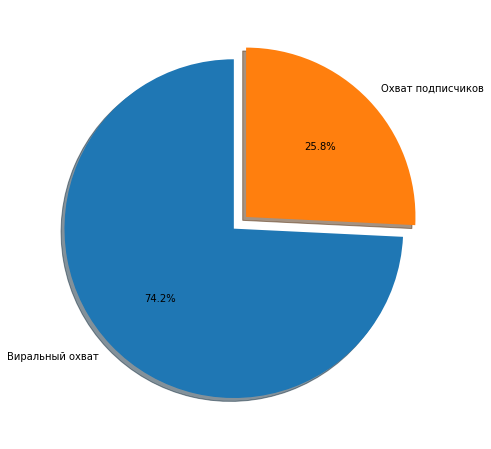

In [183]:
reach_sub_viral['Охв. виральный'].sum()
labels = 'Виральный охват', 'Охват подписчиков'
sizes = [reach_sub_viral['Охв. виральный'].sum(), reach_sub_viral['Охв. подписч.'].sum()]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(7, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show();

## 3. Анализ демографии

Начнем анализ демографии с того, что выделим данные по половозрастной  структуре аудитории.

In [230]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

In [358]:
sa=data.loc[data['Критерий']=='gender_age', ['Парам. №1', 'Парам. №2', 'Значение','Дата']]
m1=sa.loc[(data['Парам. №2']=='1-18')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m2=sa.loc[(data['Парам. №2']=='18-21')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m3=sa.loc[(data['Парам. №2']=='21-24')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m4=sa.loc[(data['Парам. №2']=='24-27')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m5=sa.loc[(data['Парам. №2']=='27-30')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m6=sa.loc[(data['Парам. №2']=='30-35')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m7=sa.loc[(data['Парам. №2']=='35-45')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
m8=sa.loc[(data['Парам. №2']=='45+')&(data['Парам. №1']=='М'), ['Значение']].sum().values[0]
w1=sa.loc[(data['Парам. №2']=='1-18')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w2=sa.loc[(data['Парам. №2']=='18-21')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w3=sa.loc[(data['Парам. №2']=='21-24')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w4=sa.loc[(data['Парам. №2']=='24-27')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w5=sa.loc[(data['Парам. №2']=='27-30')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w6=sa.loc[(data['Парам. №2']=='30-35')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w7=sa.loc[(data['Парам. №2']=='35-45')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
w8=sa.loc[(data['Парам. №2']=='45+')&(data['Парам. №1']=='Ж'), ['Значение']].sum().values[0]
demography=data.loc[data['Критерий']=='gender_age', ['Парам. №1', 'Парам. №2', 'Значение','Дата']]
demography=demography.rename(columns={'Парам. №1':'Пол','Парам. №2':'Возраст'})
datata = {'Пол':  ['М', 'М','М', 'М','М', 'М','М', 'М','W','W','W','W','W','W','W','W',],
        'Возраст': ['1-18', '18-21','21-24','24-27','27-30','30-35','35-45', '45+','1-18',
         '18-21','21-24','24-27','27-30','30-35','35-45', '45+'],
         'Кол-во аудитории' :[m1,m2,m3,m4,m5,m6,m7,m8,w1,w2,w3,w4,w5,w6,w7,w8]
        }

demography = pd.DataFrame (datata, columns = ['Пол','Возраст','Кол-во аудитории'])
demography

,Пол,Возраст,Кол-во аудитории
0,М,1-18,210
1,М,18-21,1005
2,М,21-24,1120
3,М,24-27,906
4,М,27-30,1774
5,М,30-35,2676
6,М,35-45,1419
7,М,45+,1167
8,W,1-18,531
9,W,18-21,2039


Отразим на графиках данные по половой структуре аудитории. 

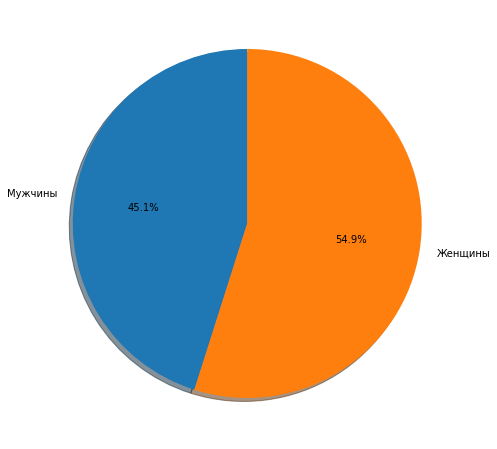

In [359]:
men=demography[['Кол-во аудитории','Пол']].groupby('Пол').sum()
list(men[0:3]['Кол-во аудитории'])
labels = 'Мужчины', 'Женщины'
sizes = list(men[0:3]['Кол-во аудитории'])

fig1, ax1 = plt.subplots(figsize=(7, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show();

Также посмотрим на половозраструю структуру аудитории. Видно, что трафик распределен более-менее равномерно, однако наибольшее количество аудитории находится в группе от 30 до 35 лет.

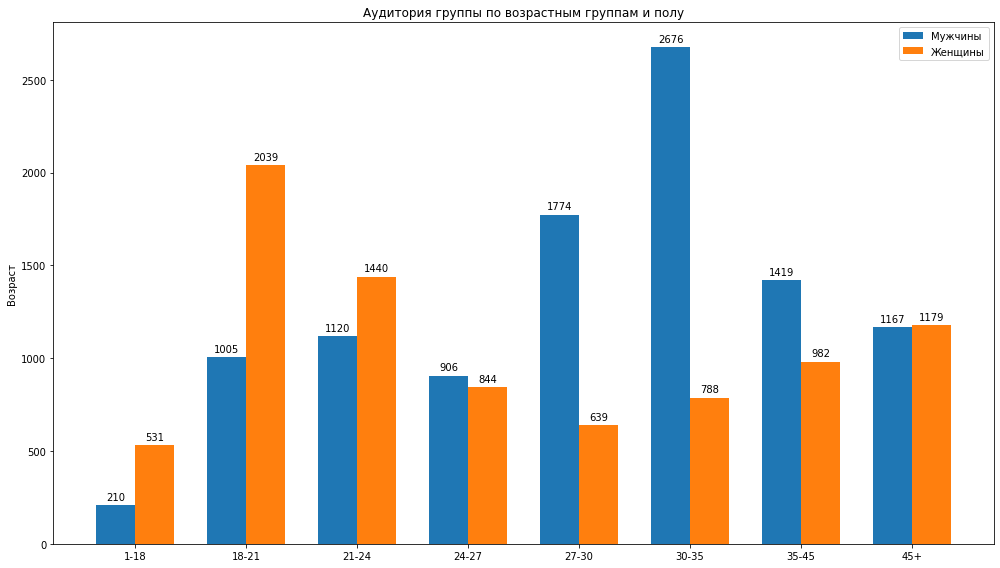

In [364]:
labels=list(demography['Возраст'])[0:8]
men_means=list(demography['Кол-во аудитории'])[:8]
women_means=list(demography['Кол-во аудитории'])[8:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, men_means, width=0.35, label='Мужчины')
rects2 = ax.bar(x + width/2, women_means, width=0.35, label='Женщины')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Кол-во аудитории')
ax.set_ylabel('Возраст')
ax.set_title('Аудитория группы по возрастным группам и полу')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show();

Также покажем откуда поступает трафик в группу на географической карте. Легко заметить, что в основном трафик поступает из России

In [326]:
countries=data.loc[(data['Критерий']=='countries')&(data['Год']=='2019'), ['Значение', 'Парам. №1']].groupby('Парам. №1').sum()
countries_new = countries[countries['Значение']>=8].rename(index={'Кыргызстан':'KGZ','Финляндия':'FIN', 'Эстония':'EST','Литва':'LTU', 'Великобритания':'GBR','Россия': 'RUS', 'Беларусь': 'BLR', 'Казахстан': 'KAZ', 'Молдова': 'MDA','Украина': 'UKR','Германия': 'DEU', 'Италия': 'ITA', 'Кипр': 'CYP', 'США': 'USA', 'Узбекистан': 'UZB'})
countries_new=countries_new.reset_index()
countries_new=countries_new.rename(columns={'Значение': 'Посещения в 2019', 'Парам. №1': 'code'})

import geopandas as gpd
shapefile = '110_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159])
merged = gdf.merge(countries_new, left_on = 'country_code', right_on = 'code', how = 'left')

import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.resources import INLINE
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 5, high = 120)
#Define custom tick labels for color bar.
tick_labels = {'15':'>15', '30':'>30', '45':'>45', '60':'>60', '75':'>75', '90':'>90', '105':'>105', '130':'>120'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'География аудитории в 2019 году', plot_height = 540 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Посещения в 2019', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook(resources=INLINE)
#Display figure.
show(p);

Loading BokehJS ...

## 4. Анализ обратной связи

В завершение взглянем на график недельной активности аудитории. Видно, что аудитория группы не проявляет большой активности: в среднем в неделю пользователи ставят около 8 лайков, в количество комментариев и репостов ничтожно мало.

In [365]:
from IPython.display import HTML;HTML('''<script>code_show=true; function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Показать/скрыть код"></form>''')

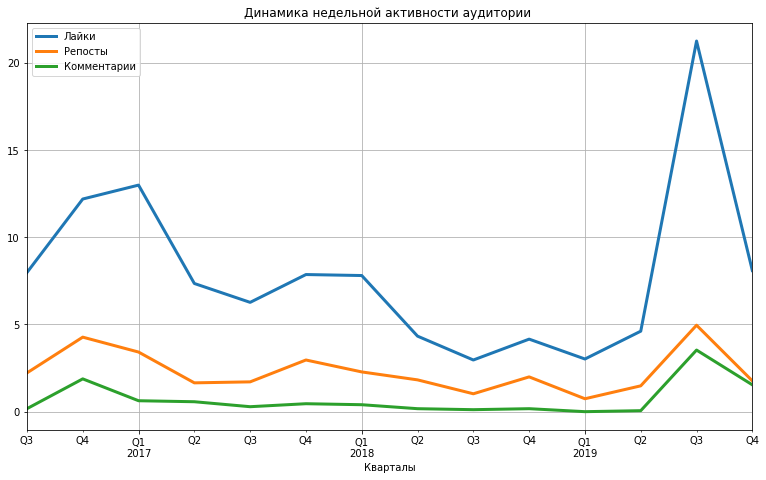

In [350]:
overral

feed=overral.groupby(overral['quaters'])[['Лайки', 'Репосты', 'Комментарии']].aggregate(sum)*7/(30.74*4)
feed=feed.reset_index()
feed=feed.rename(columns={'quaters': 'Кварталы'})
feed=feed.set_index('Кварталы')
feed[0:14].plot(kind='line', title='Динамика недельной активности аудитории ', linewidth=3, grid=True, figsize=(13,7.5), use_index=True);


## Вывод

В целом, группа не слишком популярна, как показывает анализ ее охвата, большинство трафика идет из России. Наиболее часто встречаются пользователи из в возрастной группе от 30 до 35 лет. Аудитория не проявляет большой активности.
Учитывая, что продвижение нового товара планируется среди активных пользователей из России моложе 30 лет, то я бы **не рекоммендовал** данную группу для использования в рекламной компании.